In [90]:
import tweepy
import requests as r
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from twitter_keys import Access_Token, Access_Token_Secret, Consumer_Key, Consumer_API_Secret

In [123]:
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_API_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [129]:
user = '@SouthwestAir'
startTime = time.clock()
tweet_text = []
for x in range(50):
    public_tweets = api.user_timeline(user, page = x)
    
    for tweet in public_tweets:
        tweet_text.append(tweet['text'])
    
    print('Running page ' + str(x) + ' of 50.')
endTime = time.clock()
print('The search took ' + str((endTime - startTime) * 1000) + ' milliseconds')

Running page 0 of 50.
Running page 1 of 50.
Running page 2 of 50.
Running page 3 of 50.
Running page 4 of 50.
Running page 5 of 50.
Running page 6 of 50.
Running page 7 of 50.
Running page 8 of 50.
Running page 9 of 50.
Running page 10 of 50.
Running page 11 of 50.
Running page 12 of 50.
Running page 13 of 50.
Running page 14 of 50.
Running page 15 of 50.
Running page 16 of 50.
Running page 17 of 50.
Running page 18 of 50.
Running page 19 of 50.
Running page 20 of 50.
Running page 21 of 50.
Running page 22 of 50.
Running page 23 of 50.
Running page 24 of 50.
Running page 25 of 50.
Running page 26 of 50.
Running page 27 of 50.
Running page 28 of 50.
Running page 29 of 50.
Running page 30 of 50.
Running page 31 of 50.
Running page 32 of 50.
Running page 33 of 50.
Running page 34 of 50.
Running page 35 of 50.
Running page 36 of 50.
Running page 37 of 50.
Running page 38 of 50.
Running page 39 of 50.
Running page 40 of 50.
Running page 41 of 50.
Running page 42 of 50.
Running page 43 of 50

In [140]:
startTime = time.clock()

compound_score = []
analyzer = SentimentIntensityAnalyzer()
for text_ in tweet_text:
    score = analyzer.polarity_scores(text_)['compound']
    compound_score.append(score)

endTime = time.clock()
print('Finished the sentiment analysis. I took ' + str((endTime - startTime) * 1000) + ' milliseconds to complete the task.')

Finished the sentiment analysis. I took 355.30299999999926 milliseconds to complete the task.


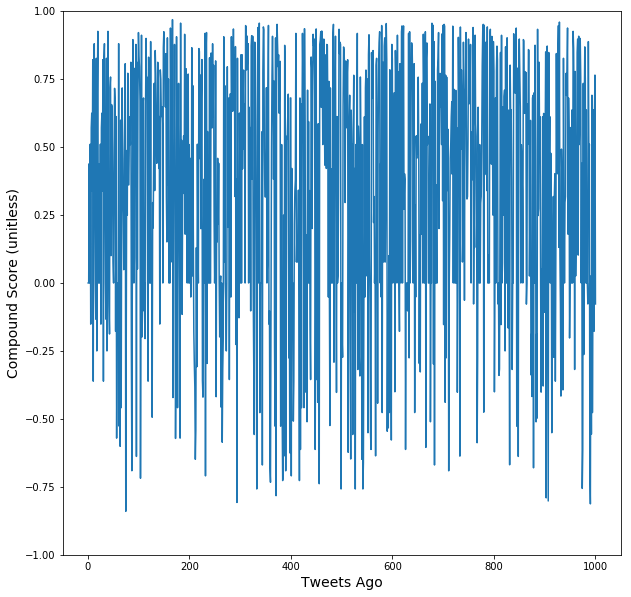

In [131]:
plt.figure(figsize = (10, 10))
plt.plot(np.arange(1, len(compound_score) + 1), compound_score)
plt.xlabel('Tweets Ago', fontsize = 14)
plt.ylabel('Compound Score (unitless)', fontsize = 14)
plt.ylim(-1, 1, 0.25)
plt.show()

In [134]:
tweet_text[100]

'@MarkDPhotos_ Sounds like you nailed it. Thanks for flying with us! Enjoy the rest of your night. ^AS https://t.co/OQ3wvcD1xK'

In [ ]:




#	1.  Download the text of all 500 tweets on the timeline of the user and store in a list. 
#	2.  Loop through each tweet and perform a sentiment analysis on each string and store the compound value 
#			in a corresponding list. 
#	3.  Plot the sentiment data using a matplotlib scatter plot and export the png file.
#	4.  Respond to the user that requested the analysis and reply with the png file that was created. 

#Questions: 
#	1.  Will need to create a file on the local computer to hold all of the png files that was created. 
#	2.	Each time that the script processes a request, the png file is replaced. 
#	3.	Will the search function in tweepy work?  Do I need to only retrieve the 500 most recent tweets that
#			was put out by the user?  I think search retreives the most recent 500 tweets from the feed which includes
#			the tweets that was put out by the user and the ones directed to the user. 

#Stack
#tweepy search
#Parse JSON
#Plot data using matplotlib